importing libraries

In [1]:
from keras.datasets import mnist
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

 Load MNIST dataset.

In [2]:
#loading
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
 


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


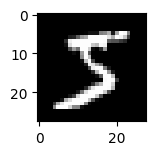

In [3]:
#plotting
for i in range(1):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

 Standardize your dataset

In [4]:
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)
std_train[std_train == 0] = 1e-9
X_train = (X_train - mean_train) / std_train

mean_test = np.mean(X_test, axis=0)
std_test = np.std(X_test, axis=0)
std_test[std_test == 0] = 1e-9
X_test = (X_test - mean_test) / std_test

X_data = np.concatenate((X_train, X_test), axis=0)
y_data = np.concatenate((Y_train, Y_test), axis=0)

X_data = X_data.reshape(X_data.shape[0],-1)
print(X_data.shape)

(70000, 784)


 Implement Logistic Regression with different values for learning rate

In [5]:
class Logistic_Regression():
    
    
    # declaring learning rate & number of iterations (Hyperparametes)
    def __init__(self, learning_rate, no_of_iterations):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
        
    # fit function to train the model with dataset
    def fit(self, X, Y):
        
        # number of data points in the dataset (number of rows)  -->  m
        # number of input features in the dataset (number of columns)  --> n
        self.m, self.n = X.shape
        
        #initiating weight & bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()       
        
        return  self.w
    

    def update_weights(self):
        # Y_hat formula (sigmoid function)
        Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    
        
        # derivaties
        dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
        
        db = (1/self.m)*np.sum(Y_hat - self.Y)
        
        # updating the weights & bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        
        self.b = self.b - self.learning_rate * db
      
    # Sigmoid Equation & Decision Boundary
    def predict(self, X):
        Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
        Y_pred = np.where( Y_pred > 0.5, 1, 0)
        return Y_pred
    

    def score(self,y,y_hat):
        tp,tn,fp,fn = 0,0,0,0
        for i in range(len(y)):
            if y[i] == 1 and y_hat[i] == 1:
                tp += 1
            elif y[i] == 1 and y_hat[i] == 0:
                fn += 1
            elif y[i] == 0 and y_hat[i] == 1:
                fp += 1
            elif y[i] == 0 and y_hat[i] == 0:
                tn += 1
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        score = 2*precision*recall/(precision+recall)
        return score


## onehotercoder :-

In [6]:
enc = OneHotEncoder()
enc_ydata = pd.DataFrame(enc.fit_transform(y_data.reshape(-1,1)).toarray())
enc_ydata.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
from  sklearn.model_selection import train_test_split

X_data = pd.DataFrame(X_data)
x_train , x_test ,y_train , y_test = train_test_split(X_data, enc_ydata ,test_size=0.2,random_state=42)

In [8]:
model = Logistic_Regression(learning_rate= 0.001,no_of_iterations=1000)
weights = np.zeros((10,784))
for i in range (10):
    Y = enc_ydata[i]
    weights[i ,:] = model.fit(x_train,y_train[i])


In [9]:
Z = np.zeros((10,len(y_train)))
for i in range (10):
    Z[i,:] = x_train.dot(weights[i,:])
Z

array([[-0.0276667 , -0.91433069, -0.8640698 , ..., -0.56865529,
         4.16396674,  3.23103116],
       [-0.22017022, -0.15106092,  0.73270443, ...,  3.13299103,
        -0.89264242,  0.13158279],
       [-0.8325581 , -0.14883055, -1.00238705, ..., -0.61129328,
        -0.50162398,  0.55546448],
       ...,
       [-0.63977851,  0.05692614, -0.51266291, ..., -0.21595362,
        -0.97227397, -1.54560986],
       [-0.24367844,  0.29881625,  0.66879926, ..., -0.28170397,
        -0.4057928 ,  0.11852999],
       [-0.44350249,  0.0718324 ,  0.36672323, ..., -0.0542103 ,
        -0.48804859, -1.071099  ]])

In [63]:
softmax_values = np.exp(Z) / np.sum(np.exp(Z), axis=0)

predicted_class = np.argmax(softmax_values, axis=0)

print("predicted class: ")
print(predicted_class)
print("\n","-"*50,"\n")

predicted_class = pd.DataFrame(enc.fit_transform(predicted_class.reshape(-1,1)).toarray())
print("New predicted class: ")
print(predicted_class.head(5))
print("\n","-"*50,"\n")

for i in range (10):
    accuracy = np.mean(predicted_class.iloc[:, i].values == y_train[i]) * 100
    print(f"Accuracy of class({i}): ",accuracy)

predicted class: 
[6 4 1 ... 1 0 0]

 -------------------------------------------------- 

New predicted class: 
     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

 -------------------------------------------------- 

Accuracy of class(0):  97.72857142857143
Accuracy of class(1):  96.10892857142858
Accuracy of class(2):  96.95357142857142
Accuracy of class(3):  96.00892857142857
Accuracy of class(4):  97.52678571428571
Accuracy of class(5):  95.94821428571429
Accuracy of class(6):  97.78750000000001
Accuracy of class(7):  96.52857142857142
Accuracy of class(8):  96.03035714285714
Accuracy of class(9):  95.95
